In [1]:
from dimension_magic import get_emg_ica,get_glove_data
from PlotUtility import plot_multi_channel
from MyKinFitter import MyoKinFitter
from MyKinPro import MyKinPro
import matplotlib.pyplot as plt
from group_stats import find_correlation,custom_correlation
import scipy
import numpy as np
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from signal_utilities import find_custome_moving_average,plot_spectrum,find_baselines,subtract_baseline_from_signals,calculate_power_of_signal,gaussian_filter_signal,custom_norm,lowpass_fiter_signals,find_baseline_peakutil
from MyKinAda import MyKinAda

The reconstructed phase space has 112 dimensions with 127468 time samples each
first 69 principle components catpures 95 percent of all variances
There are 55 sources with time dependent signals


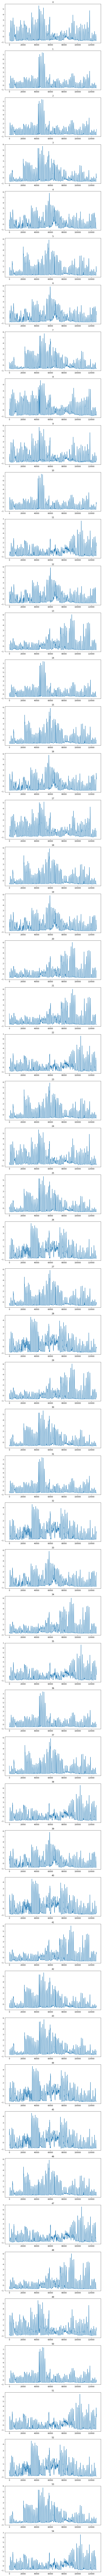

In [2]:
time_dependent_sources = get_emg_ica()
# emg_power = calculate_power_of_signal(time_dependent_sources)
emg_power = gaussian_filter_signal(np.abs(time_dependent_sources))
emg_power = custom_norm(emg_power)
plot_multi_channel(emg_power,titles = [f'{i}' for i in range(emg_power.shape[1])])

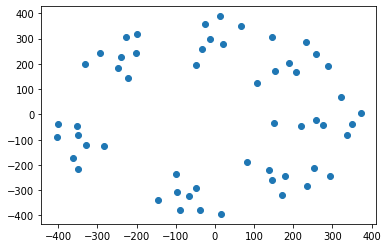

In [3]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(emg_power.T)
plt.scatter(X_transformed[:,0],X_transformed[:,1])

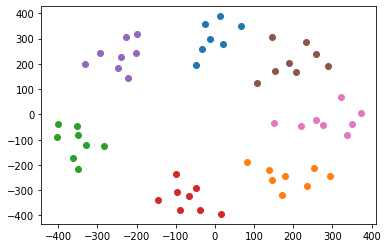

In [4]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_transformed)
for i in range(7):
    in_cat = kmeans.labels_==i
    plt.scatter(X_transformed[in_cat,0],X_transformed[in_cat,1])


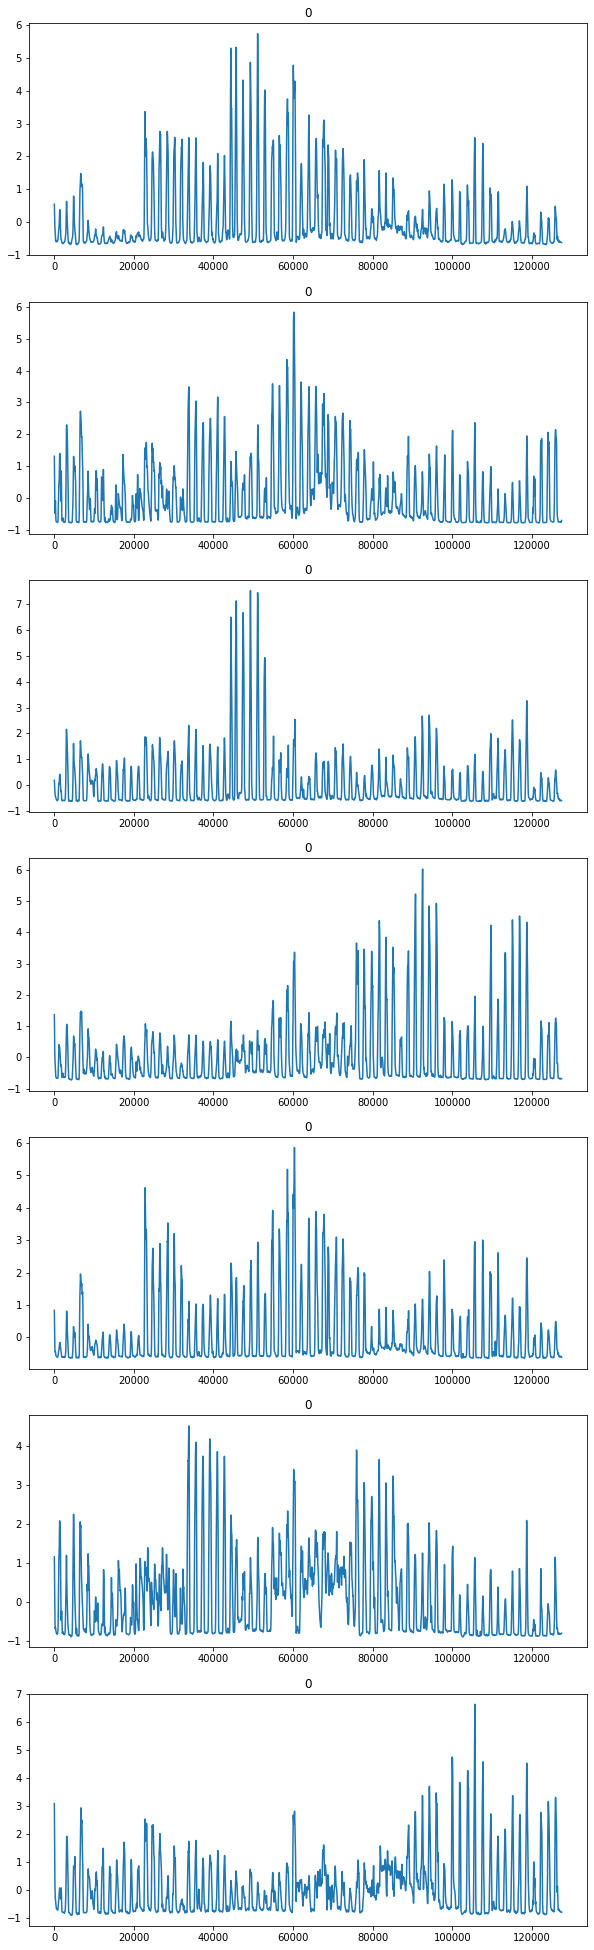

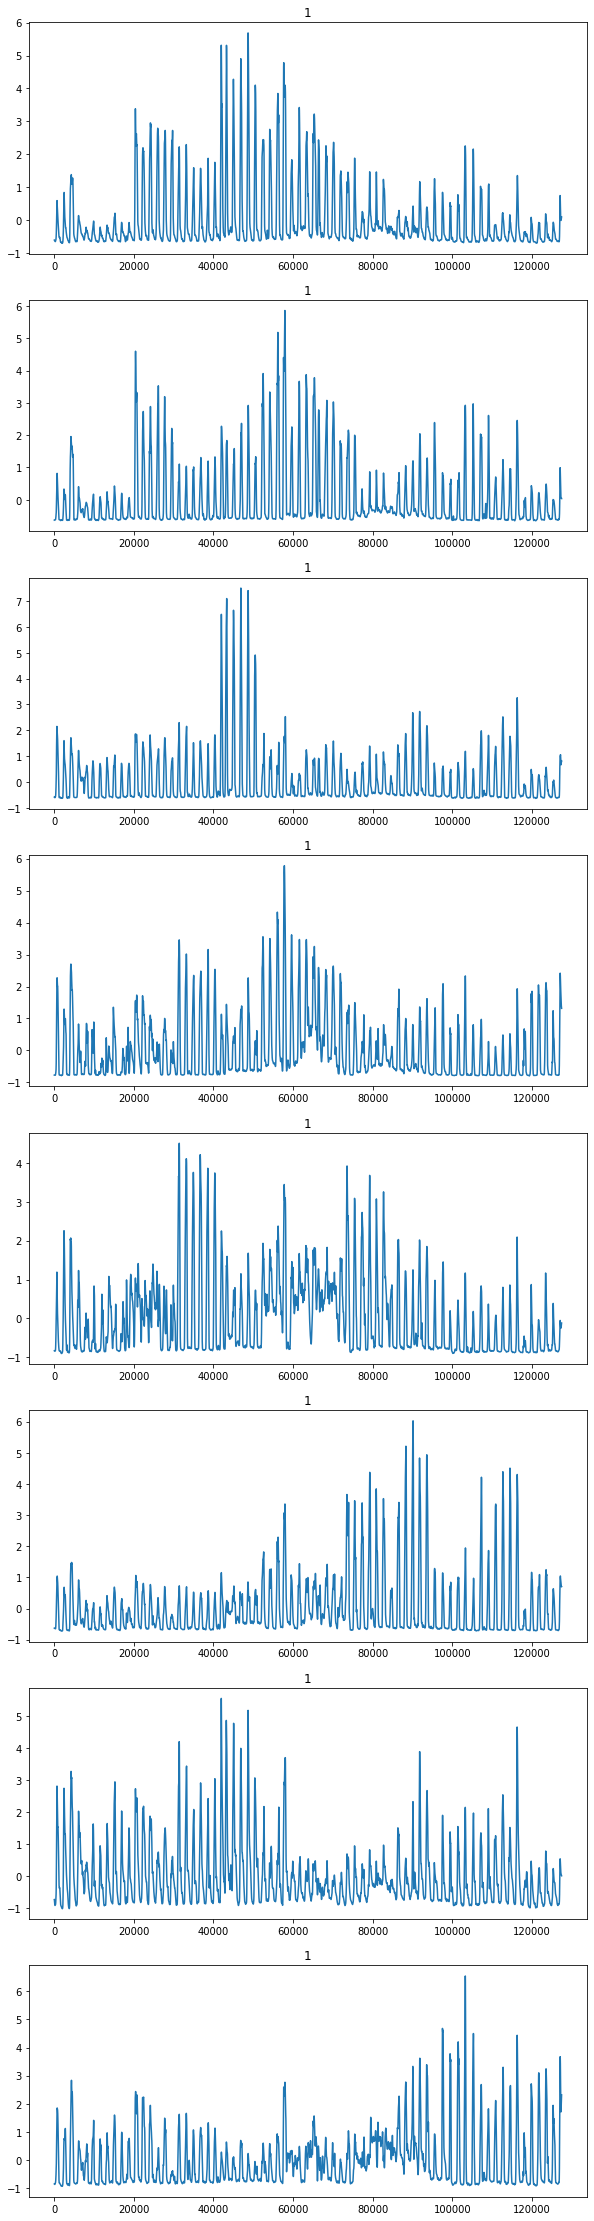

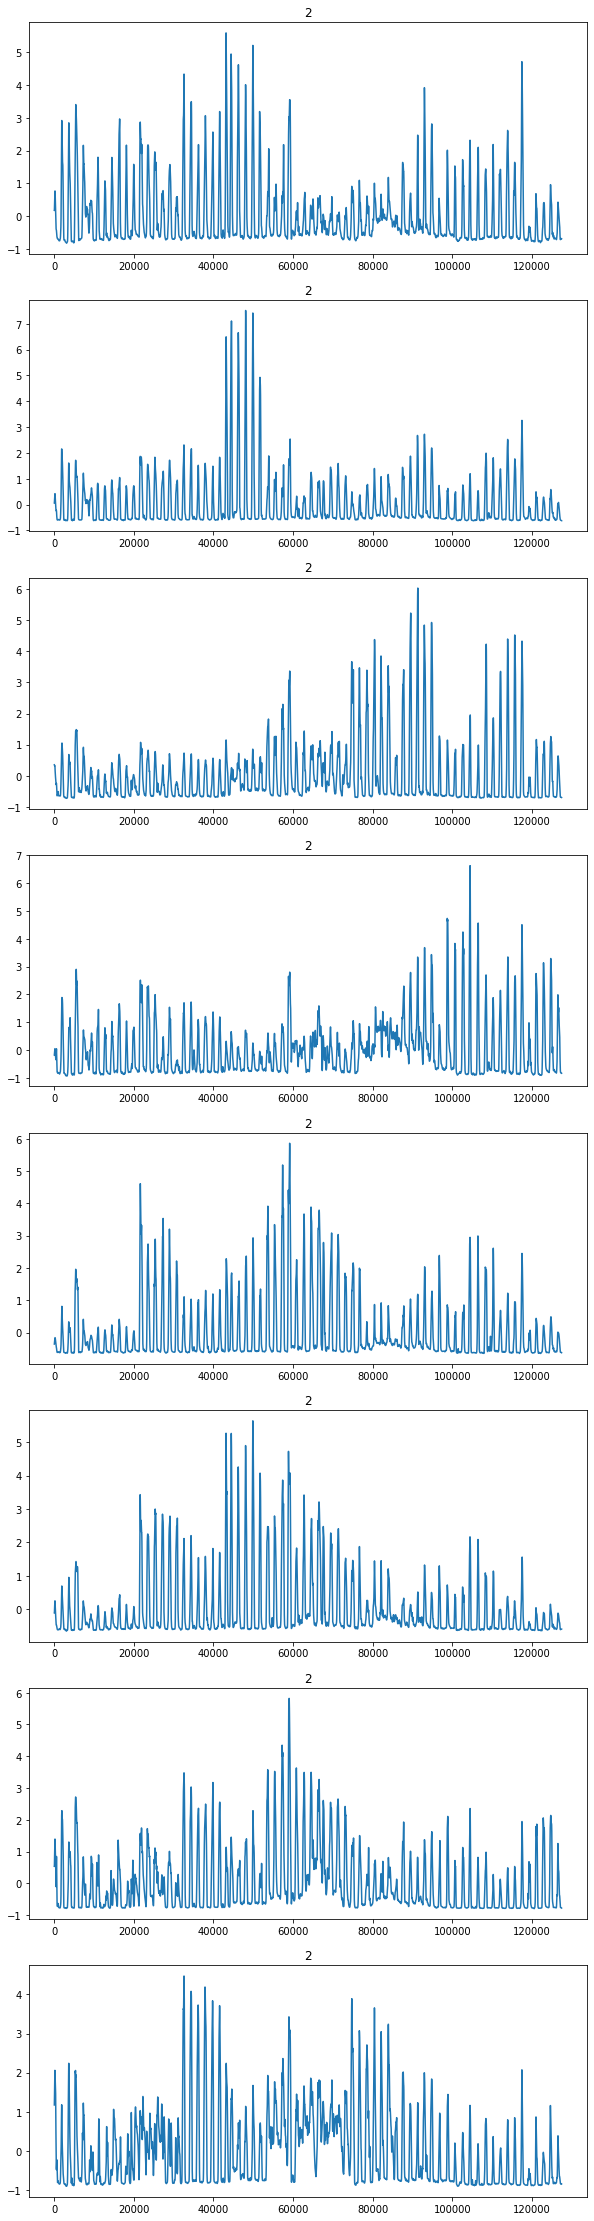

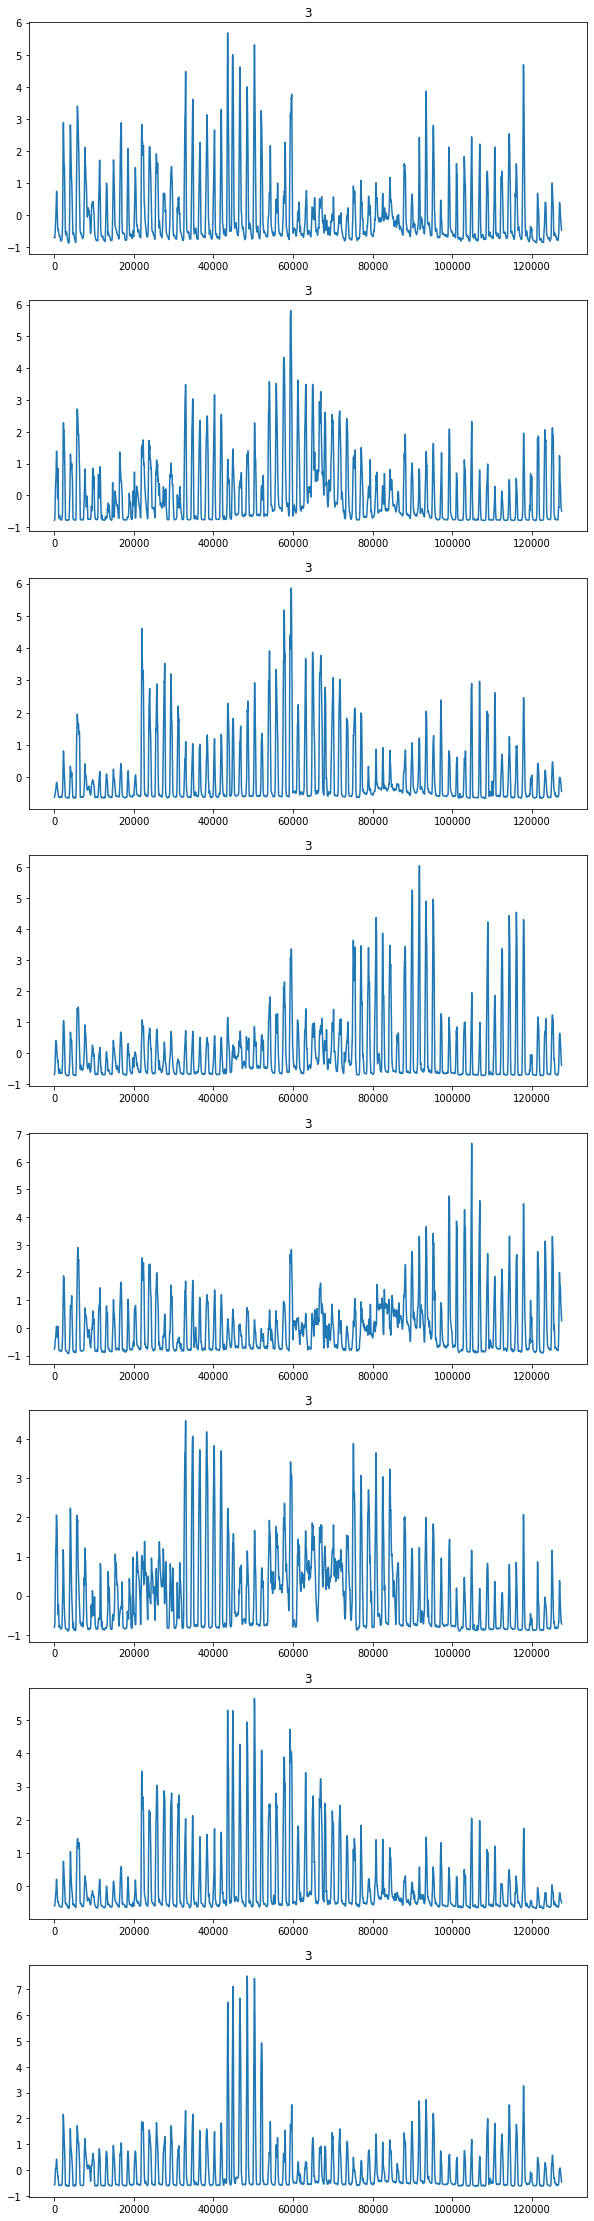

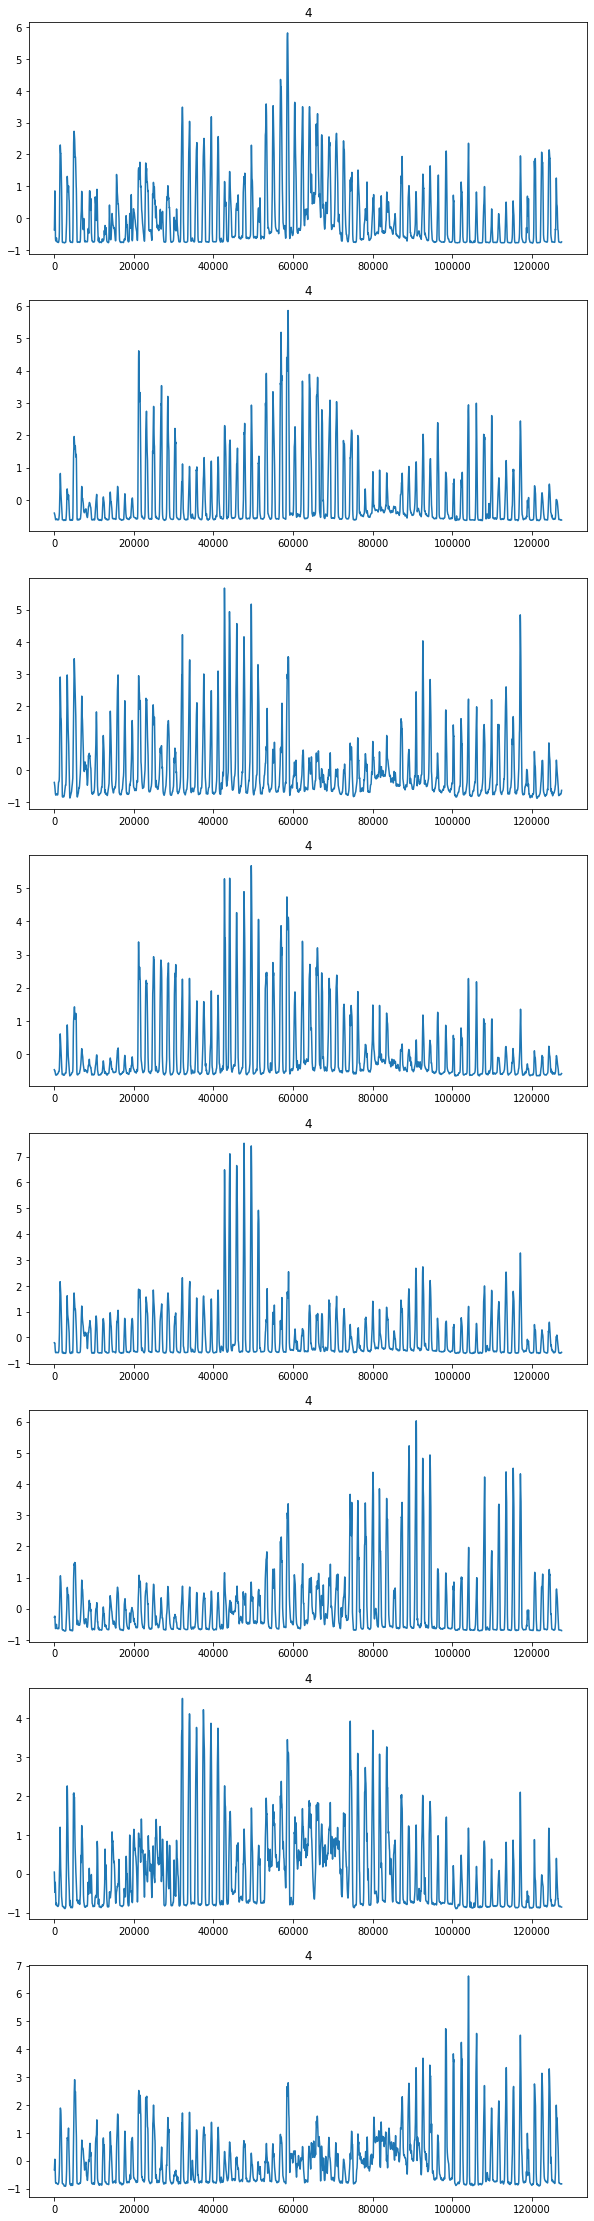

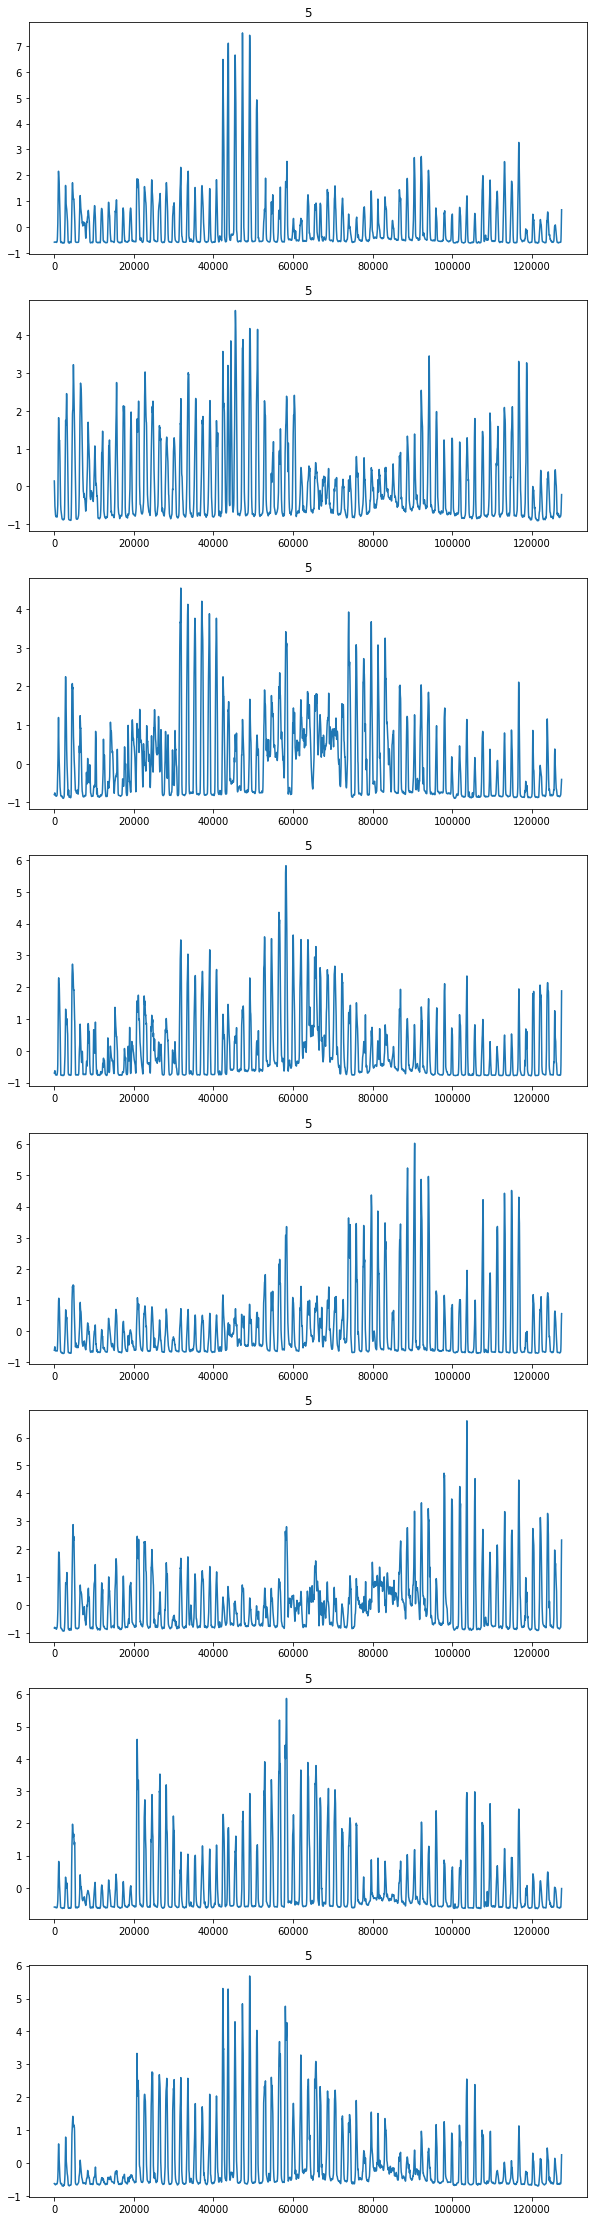

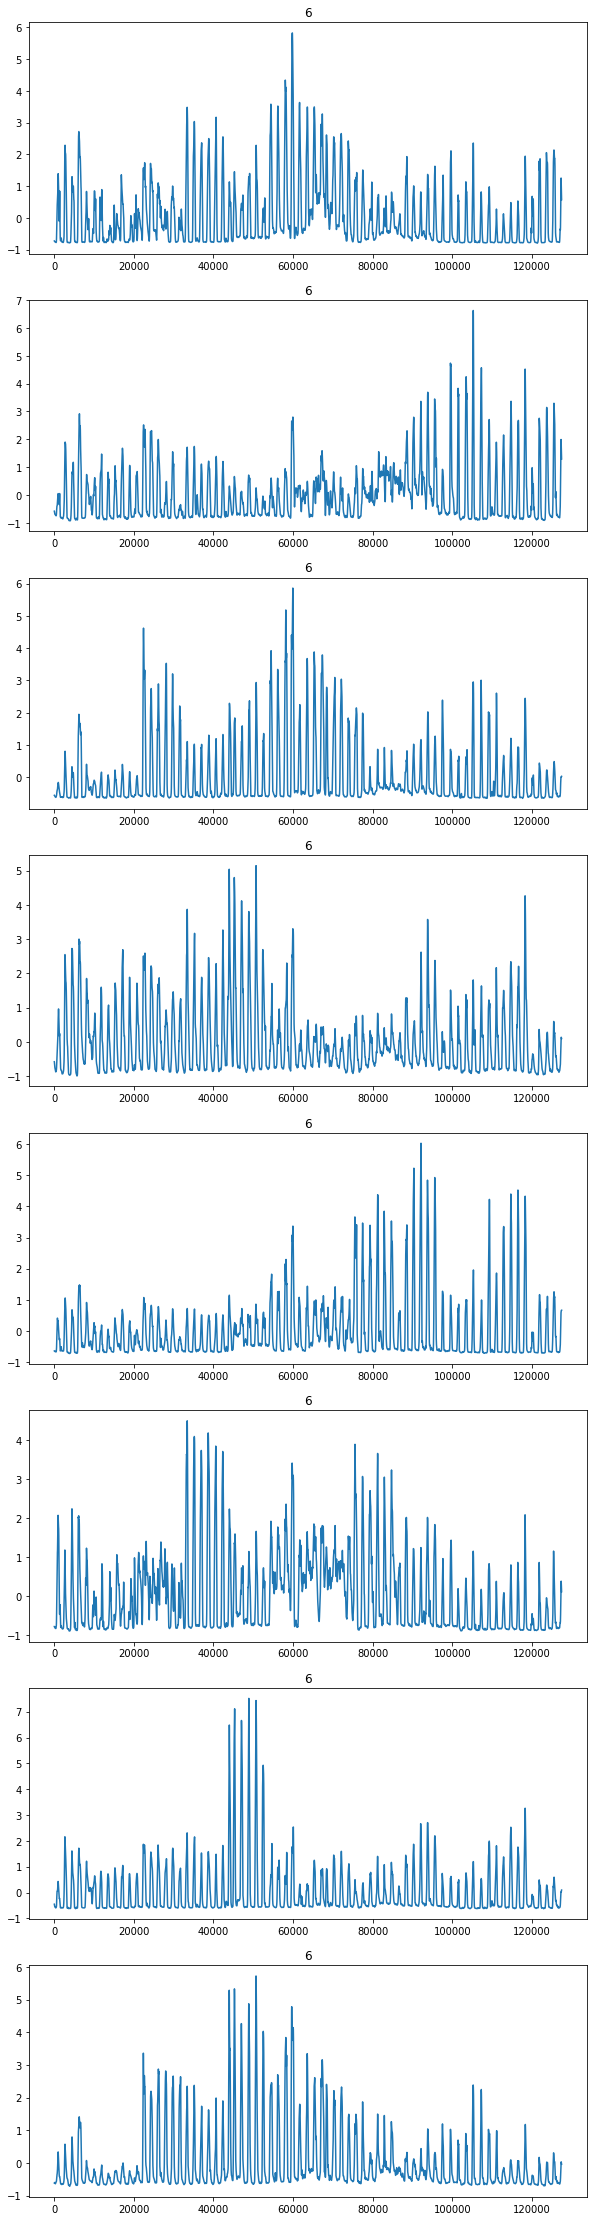

In [5]:
for i in range(7):
    in_cat = kmeans.labels_==i
    plot_multi_channel(emg_power[:,in_cat],titles = [str(i) for _ in range(sum(in_cat))])

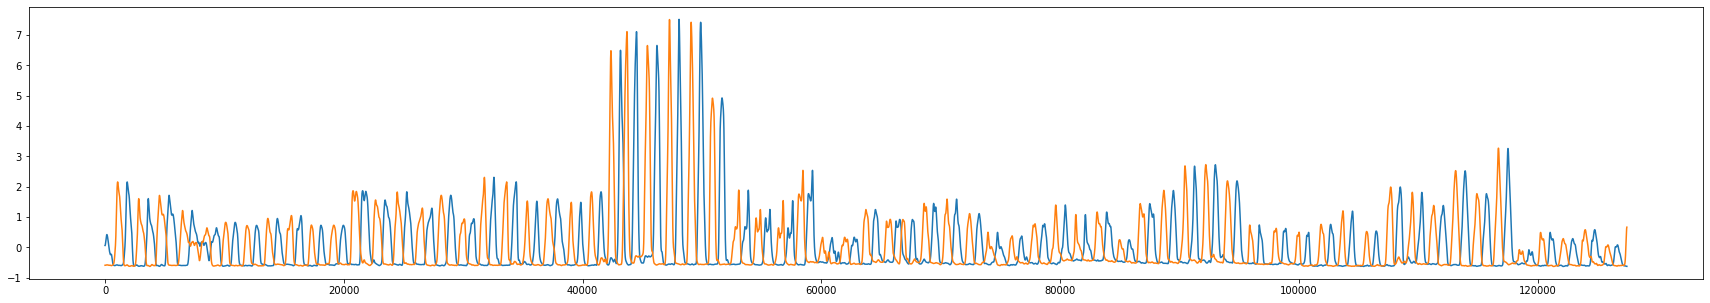

In [6]:
plt.figure(figsize=[30,5])
plt.plot(emg_power[:,1])
plt.plot(emg_power[:,2])

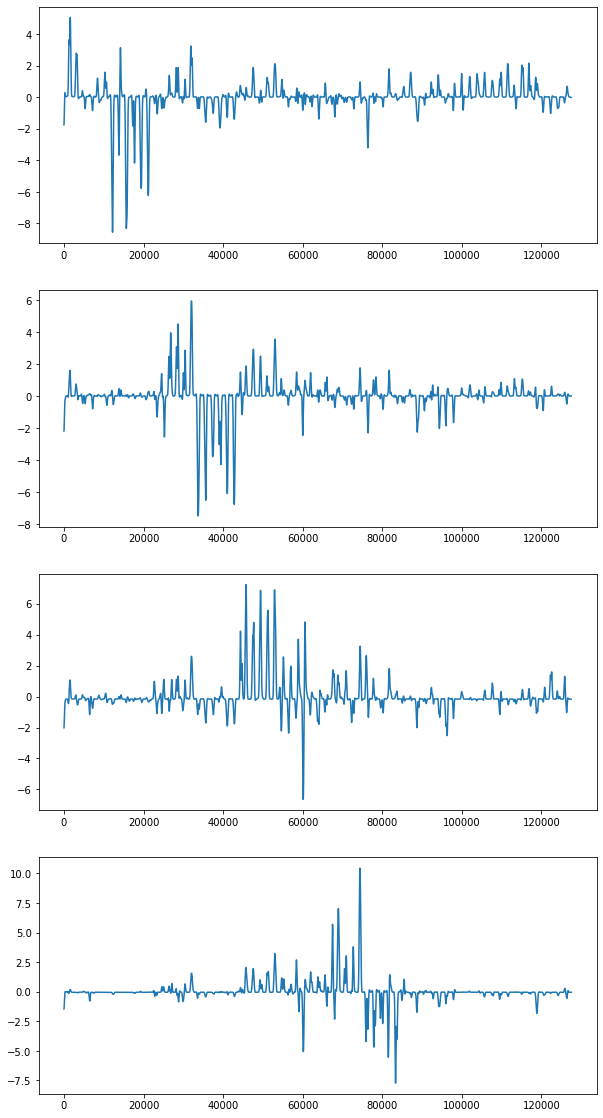

In [7]:
glove = get_glove_data()
glove = glove[:emg_power.shape[0]]
fingers = glove[:,[4,7,11,15]]
fingers = fingers - find_custome_moving_average(fingers,N=900)
fingers = gaussian_filter_signal(fingers,100)
fingers = custom_norm(fingers)
fingers_power = calculate_power_of_signal(fingers)
fingers_power = custom_norm(fingers_power)
plot_multi_channel(fingers)

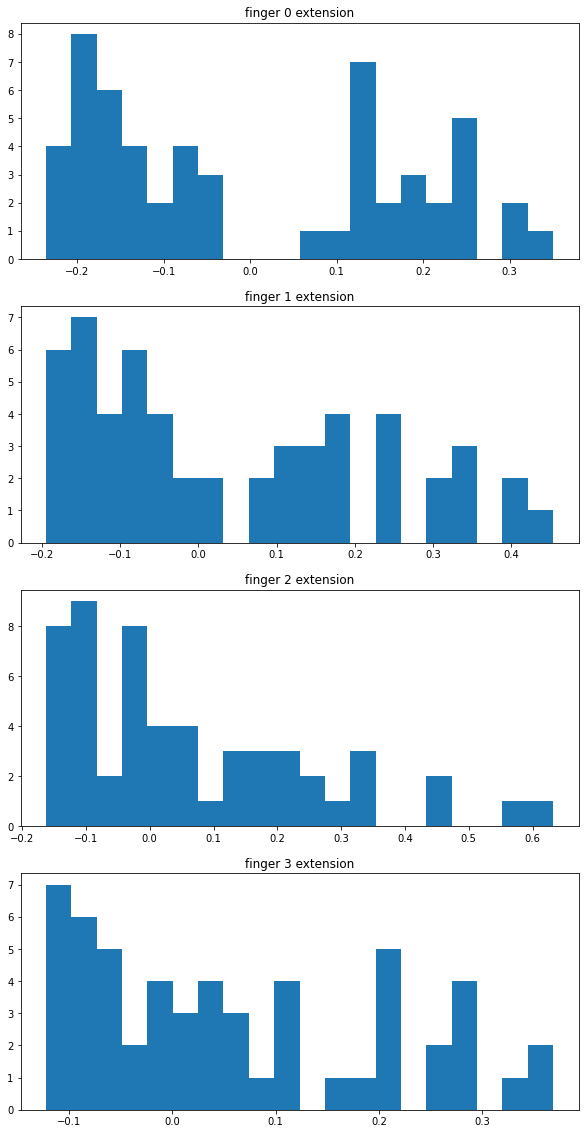

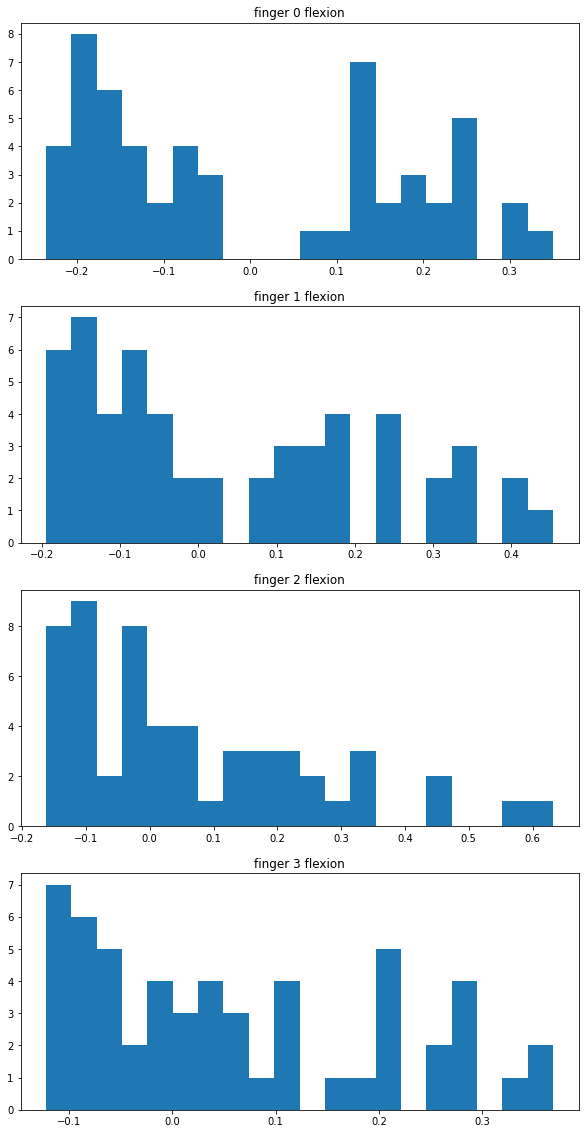

In [8]:
fitter = MyKinAda(fingers,emg_power)
fitter.plot_correlation_coefficient_histogram_for_each_joint()

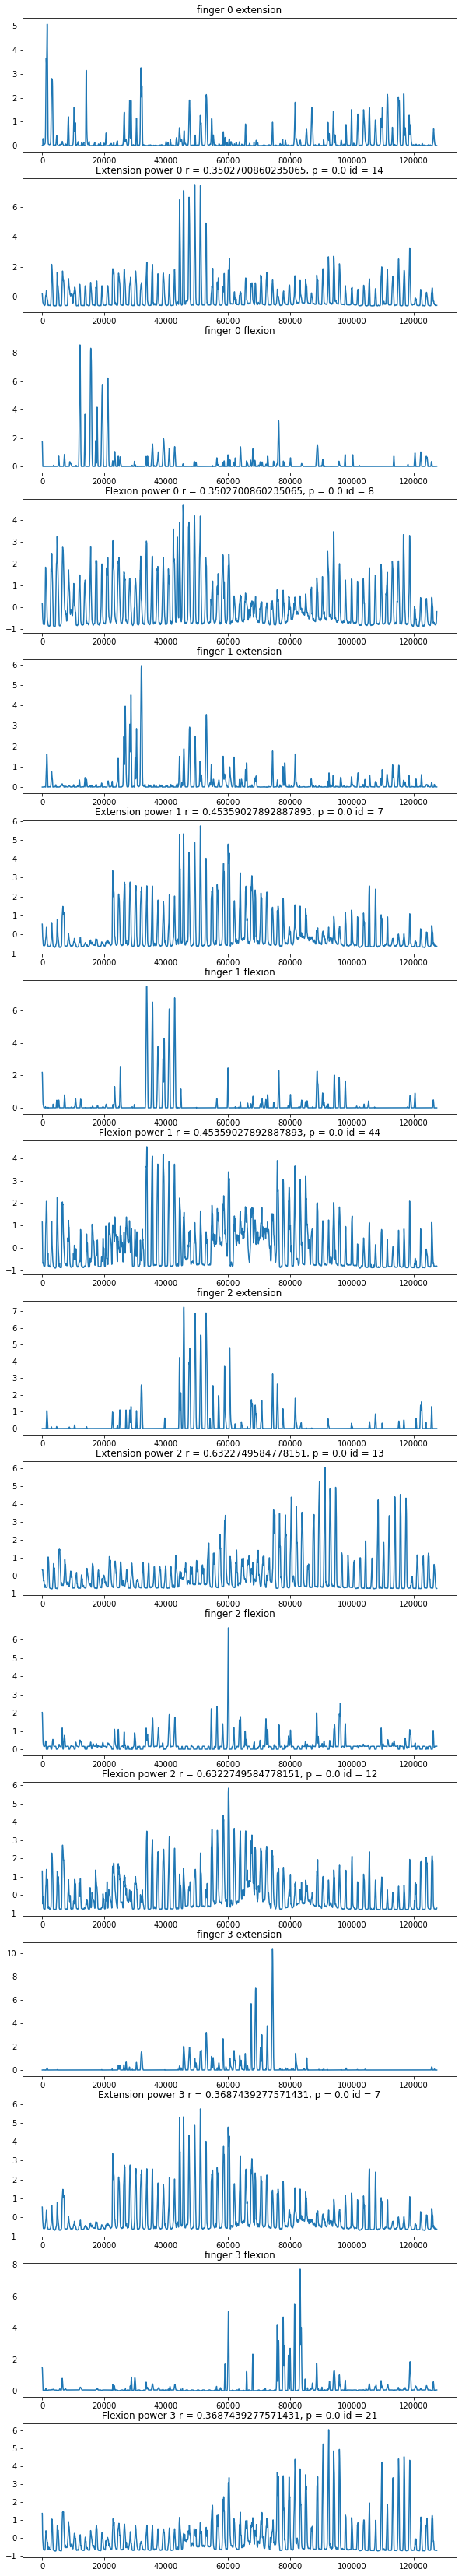

In [9]:
fitter.plot_best_fit_channels()

In [13]:
fitter.fit_mykin_model(stepsize = 1,fudge_factor = 1e-6,max_it=1000,minibatchsize=None,minibatch_ratio=0.01)
fitter.show_model_fit()

TypeError: fit_mykin_model() got an unexpected keyword argument 'stepsize'

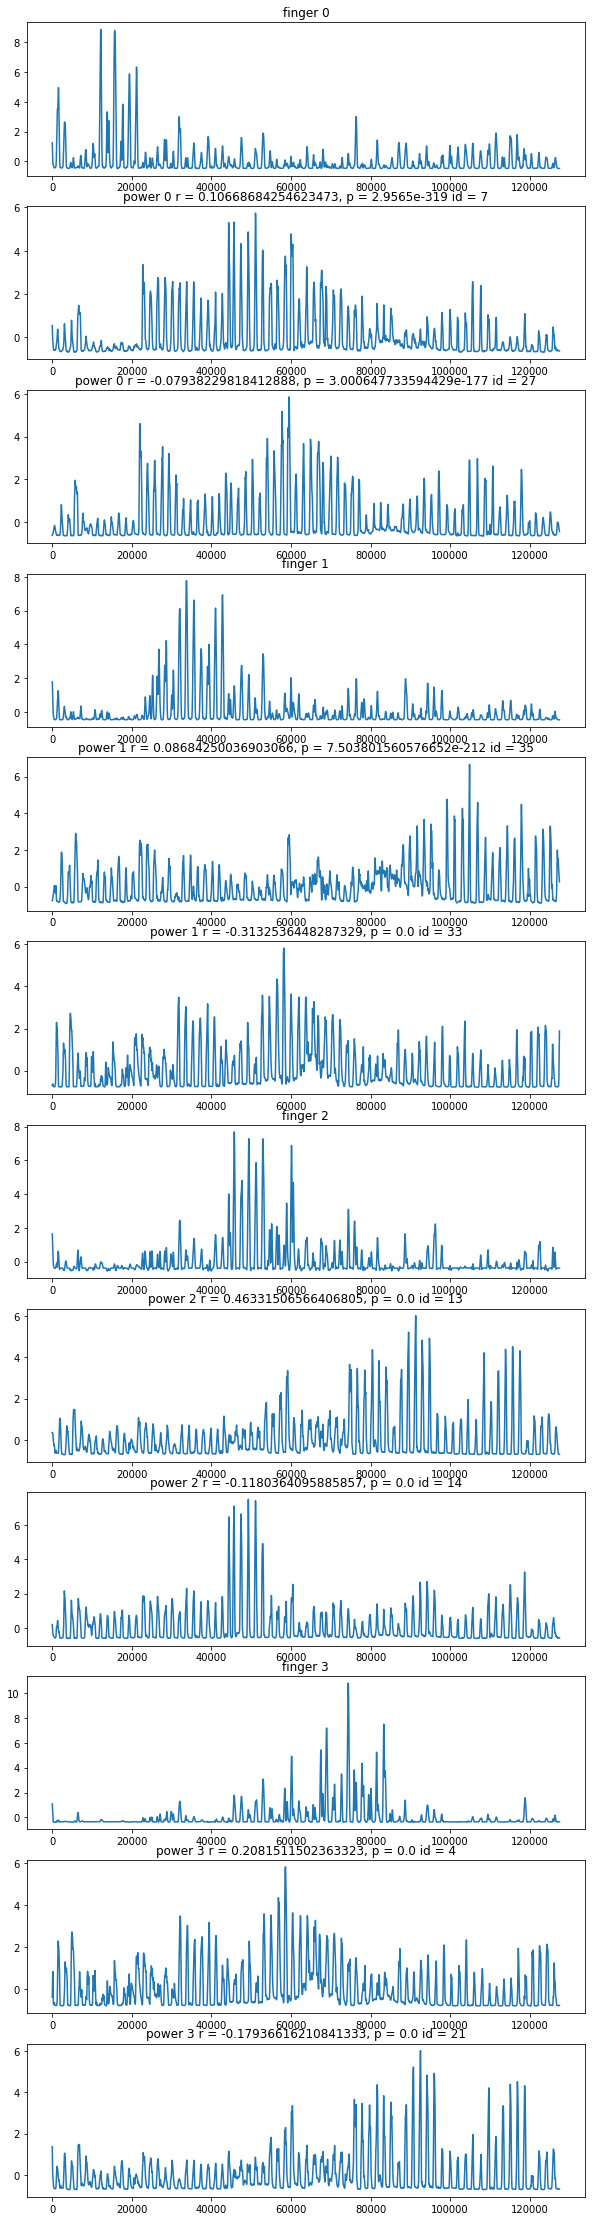

In [11]:
fitter = MyoKinFitter(fingers,fingers_power,emg_power)
fitter.plot_best_fit_channels()

optimizing finger 0
optimizing finger 1
optimizing finger 2
optimizing finger 3


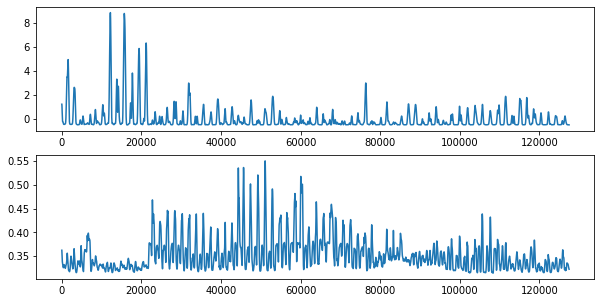

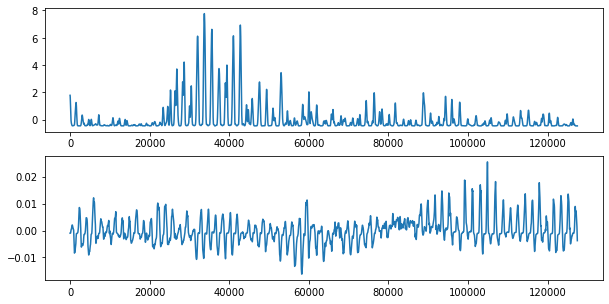

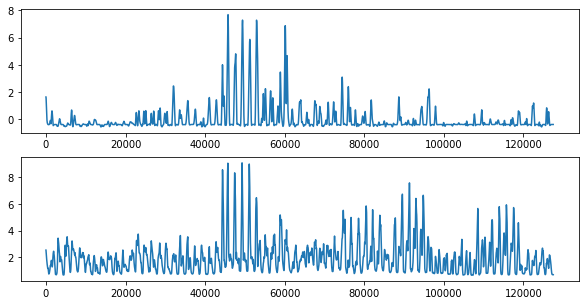

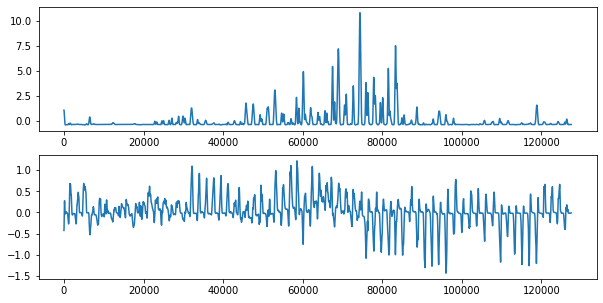

In [12]:
fitter.fit_mykin_model()
fitter.show_model_fit()